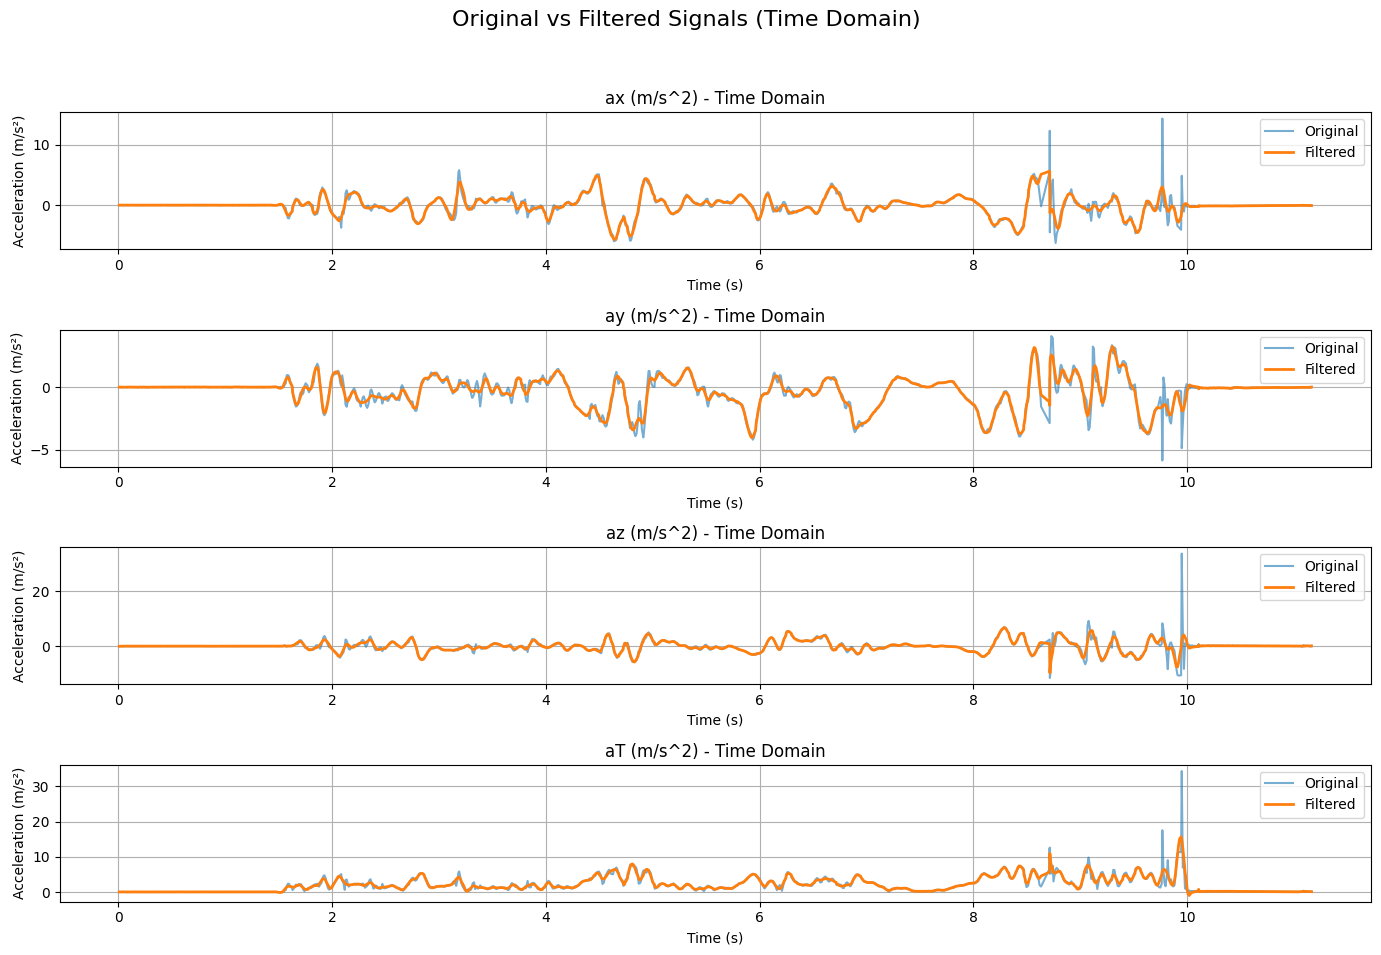

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Exercise.csv")   
columns_to_plot = ['ax (m/s^2)', 'ay (m/s^2)', 'az (m/s^2)', 'aT (m/s^2)']
time = df['time'].values
Fs = 1 / np.mean(np.diff(time))  
cutoff_freq = 10
order = 4
b, a = butter(order, cutoff_freq / (0.5 * Fs), btype='low')
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(14, 10))
fig.suptitle("Original vs Filtered Signals (Time Domain)", fontsize=16)
for i, col in enumerate(columns_to_plot):
    signal = df[col].values
    filtered_signal = filtfilt(b, a, signal)

    axes[i].plot(time, signal, label='Original', alpha=0.6)
    axes[i].plot(time, filtered_signal, label='Filtered', linewidth=2)
    axes[i].set_title(f'{col} - Time Domain')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Acceleration (m/s²)')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
